# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [11]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
fraud.shape

(1000000, 8)

In [4]:
fraud.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [7]:
# checking anomalities
fraud.isna().sum() * 100 / len(fraud)


distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64

In [8]:
number_of_fraud = fraud['fraud'].value_counts(normalize=True)
number_of_fraud

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Checking the data distribution


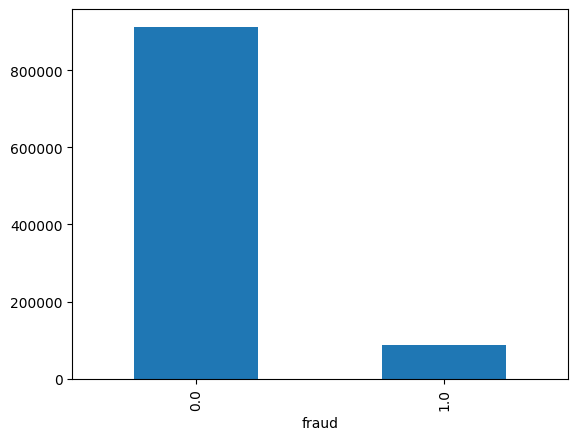

In [13]:
number_of_fraud = fraud['fraud'].value_counts()
number_of_fraud.plot(kind='bar')
plt.show()

Based on the above plot, we can say that we're dealing with imbalanced data

Training with a Logistic Regression

In [17]:
features = fraud.drop(columns= ['fraud'])
target = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [16]:
log_reg = LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)

C:\Users\jugal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
log_reg.score(X_test, y_test)

0.956172

In [20]:
pred = log_reg.predict(X_test)
print(classification_report(y_pred= pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228208
         1.0       0.88      0.57      0.70     21792

    accuracy                           0.96    250000
   macro avg       0.92      0.78      0.84    250000
weighted avg       0.95      0.96      0.95    250000



Oversampling

In [21]:
y_train.value_counts()

fraud
0.0    684389
1.0     65611
Name: count, dtype: int64

In [22]:
train = pd.DataFrame(X_train, columns=X_train.columns)

In [23]:
train['fraud'] = y_train.values

In [25]:
fraud_transac = train[train['fraud'] == 1]
print(fraud_transac.shape)

legit_transac = train[train['fraud'] == 0]
print(legit_transac.shape)


(65611, 8)
(684389, 8)


In [29]:
yes_oversampled = resample(fraud_transac,
                           replace=True,
                           n_samples=len(legit_transac),
                           random_state=0)

In [30]:
train_over = pd.concat([yes_oversampled, legit_transac])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
779876,21.206593,3.359646,5.303534,1.0,0.0,0.0,1.0,1.0
189759,40.529507,3.720681,5.694384,1.0,0.0,0.0,1.0,1.0
932568,2.692887,0.011491,8.214679,1.0,1.0,0.0,1.0,1.0
134429,12.987682,0.313847,5.934031,1.0,0.0,0.0,1.0,1.0
172152,20.368107,1.814032,7.433877,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
18871,8.204809,0.237854,1.601934,1.0,0.0,0.0,1.0,0.0
364073,21.844975,1.490788,2.021169,1.0,0.0,0.0,0.0,0.0
879227,54.048321,11.465816,1.392947,1.0,0.0,0.0,0.0,0.0
80119,2.043109,2.537154,1.763643,1.0,0.0,0.0,0.0,0.0


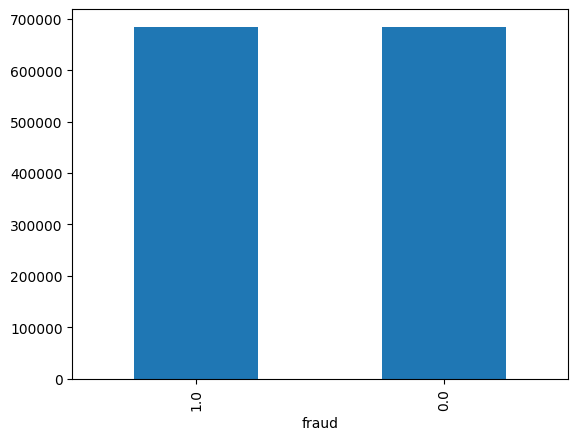

In [31]:
fraud_plt = train_over['fraud'].value_counts()
fraud_plt.plot(kind='bar')
plt.show()

In [ ]:
# Creating a new instance of Logistic Regression with the balanced data
X_train_over = train_over.drop(columns=['fraud'])
y_train_over = train_over['fraud']

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

C:\Users\jugal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
pred = log_reg.predict(X_test)
print(classification_report(y_pred= pred, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228208
         1.0       0.56      0.95      0.70     21792

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.83    250000
weighted avg       0.96      0.93      0.94    250000



# Undersampling

In [36]:
train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
87154,3.211172,3.105191,0.796394,1.0,0.0,0.0,0.0,0.0
521089,50.623425,0.107654,19.462403,1.0,1.0,0.0,1.0,1.0
559191,3.388589,1.805316,0.161976,1.0,0.0,0.0,1.0,0.0
788328,0.698817,0.644315,1.570922,0.0,1.0,0.0,0.0,0.0
49010,7.636978,0.628651,3.149671,1.0,0.0,0.0,1.0,0.0


In [43]:
no_undersampled = resample(legit_transac,
                           replace=False,
                           n_samples=len(fraud_transac),
                           random_state=0)
no_undersampled.shape

(65611, 8)

In [38]:
train_under = pd.concat([no_undersampled, fraud_transac])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
145473,19.788638,0.836912,6.693142,1.0,1.0,0.0,0.0,0.0
707874,5.383033,6.717711,0.449399,1.0,1.0,0.0,0.0,0.0
434768,13.247853,2.267314,0.440545,1.0,1.0,0.0,0.0,0.0
55854,8.086110,1.528182,0.267336,1.0,0.0,0.0,1.0,0.0
143772,0.330787,1.057603,1.374841,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
887766,239.256795,0.501917,8.147297,1.0,1.0,0.0,0.0,1.0
161522,1.623304,2.323816,4.119458,0.0,0.0,0.0,1.0,1.0
733407,60.808663,0.620542,8.489463,1.0,0.0,0.0,1.0,1.0
838205,3.496951,0.286264,4.747175,1.0,0.0,0.0,1.0,1.0


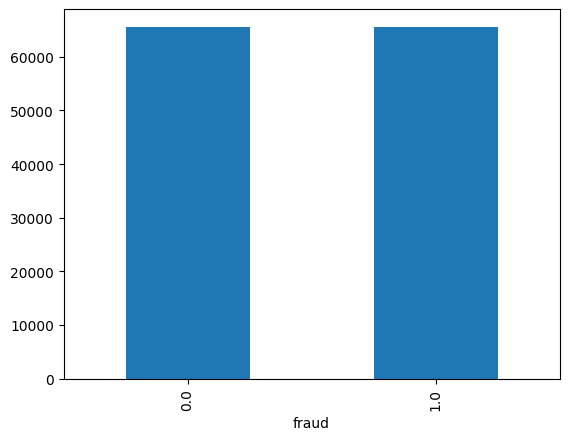

In [44]:
fraud_plt = train_under['fraud'].value_counts()
fraud_plt.plot(kind='bar')
plt.show()

In [48]:
X_train_under = train_under.drop(columns=['fraud'])
y_train_under = train_under['fraud']

In [49]:
# Model training
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

C:\Users\jugal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
pred = log_reg.predict(X_test)
print(classification_report(y_pred= pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228208
         1.0       0.57      0.95      0.71     21792

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

